In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import os
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

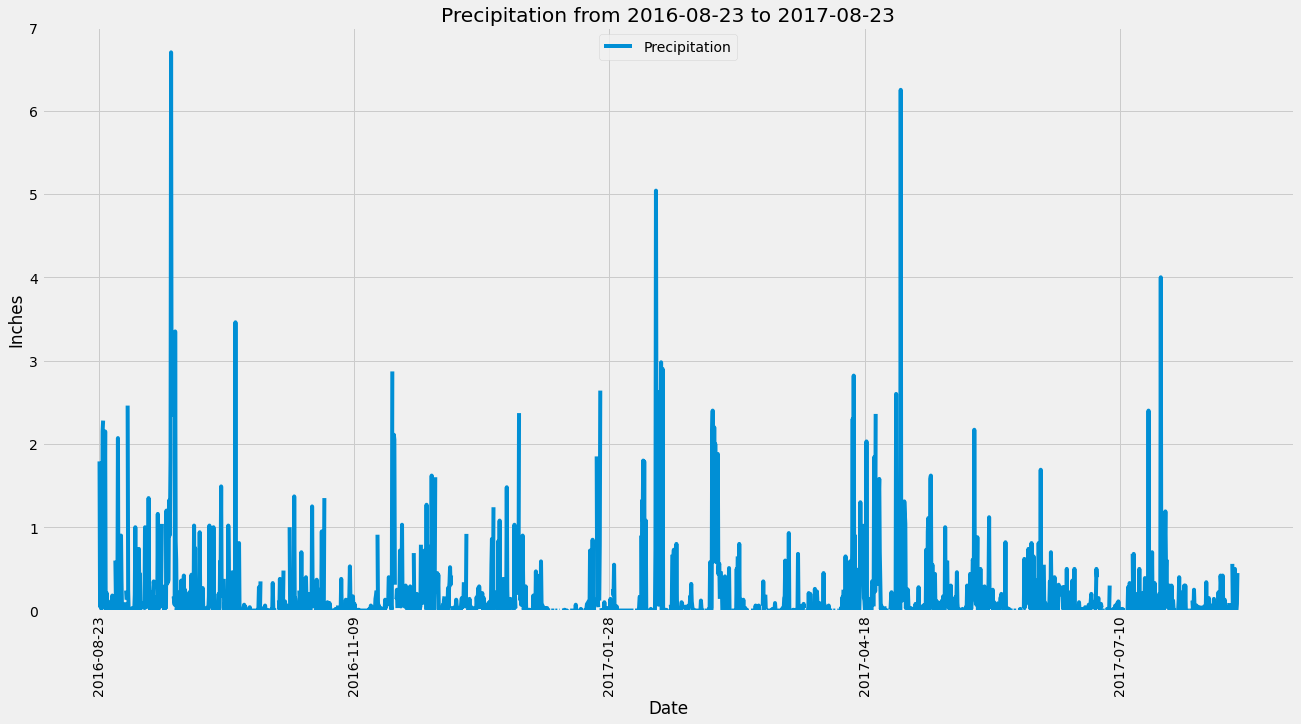

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
ytd = dt.datetime.strptime(recent_date, "%Y-%m-%d")- dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
ytd_pre = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=ytd).all()

# Save the query results as a Pandas DataFrame and set the inex to the date column
ytd_pre_df = pd.DataFrame(ytd_pre, columns = ["Date", "Precipitation"])
first_date =  ytd_pre_df['Date'].min()
ytd_pre_df.set_index("Date", inplace = True)
# ytd_pre_df.head(50)
first_date

# Sort the dataframe by date
ytd_pre_df = ytd_pre_df.sort_values(by="Date", ascending = True)
# ytd_pre_df

# Use Pandas Plotting with Matplotlib to plot the data

ytd_pre_df.plot(title=f"Precipitation from {first_date} to {recent_date}",figsize=(20, 10))
plt.legend(loc="upper center")
plt.ylim(0,7)
plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.savefig("images/United States_1.png",bbox_inches="tight")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ytd_pre_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations_df = pd.DataFrame(active_stations, columns = ["Station ID", "Activity"])
active_stations_df

,Station ID,Activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]
results = (
    f'Lowest Temperature {session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()}\n'
    f'Maximum Temperature {session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()}\n'
    f'Average Temperature {session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()}')
print(f"Values for most active Station {most_active}")
print(" ")
print(results)

       

Values for most active Station USC00519281
 
Lowest Temperature [(54.0,)]
Maximum Temperature [(85.0,)]
Average Temperature [(71.66378066378067,)]


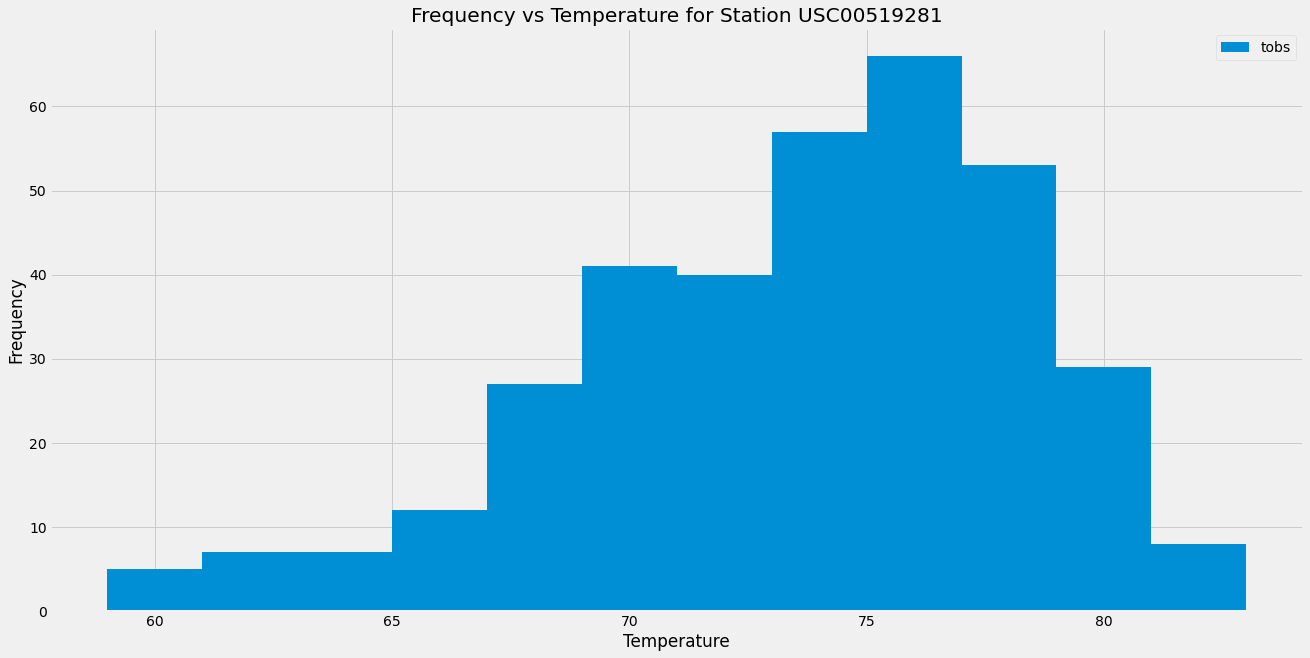

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_temp = session.query(Measurement.tobs).filter(Measurement.date>=ytd).\
    filter(Measurement.station == most_active).all()

twelve_months_temp_df = pd.DataFrame(twelve_months_temp, columns=["tobs"])

twelve_months_temp_df.plot.hist(bins=12, title = f"Frequency vs Temperature for Station {most_active}",figsize=(20, 10))
plt.xlabel('Temperature')
plt.savefig("images/frequency.png",bbox_inches="tight")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()